<a href="https://www.kaggle.com/code/mohammedtati/titanic-competition-tati?scriptVersionId=116152220" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style="color: red; text-align: center;">Titanic Competition<h1>
<h3>❖ Author:</h3>
<p>TATI Mohammed</p>
<p style="text-align: right;"><b>11-JAN | <span style="color: green;">2023</span></b></p> 

# Importing the DATA 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
print("Complete")

Complete


# Exploratory Data Analysis

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Dimentions

In [4]:
print(f"Shapes: [Train: {train.shape}, Test: {test.shape}, Submission: {sub.shape}]")

Shapes: [Train: (891, 12), Test: (418, 11), Submission: (418, 2)]


## Data Information

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Notice: 
    - We can see that there is some missing values in the data. So we have to handle it later.

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Ploting libraries
    

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

## Male vs Female in dataset

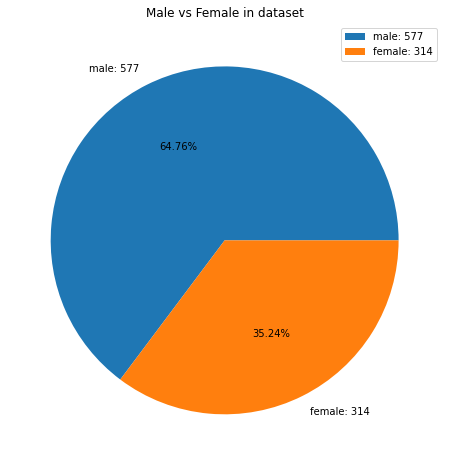

In [9]:
female = train['Sex'].value_counts()[1]
male = train['Sex'].value_counts()[0]
plt.figure(figsize=(8, 8))
plt.pie([male, female],labels=['male: '+str(male), 'female: '+str(female)], autopct="%.2f%%")
plt.title("Male vs Female in dataset")
plt.legend()
plt.show()

### Notice: 
    - The number of males is larger than females which is normal because just the number of sailors on the titanic was big.

## Distrabution of the data

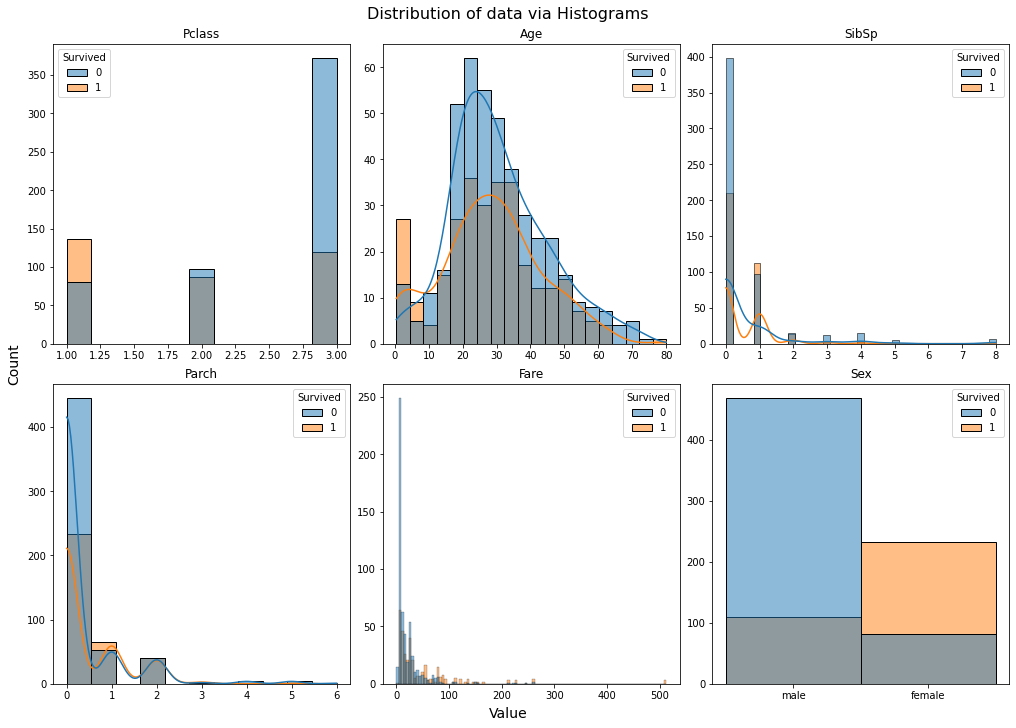

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(14, 10), constrained_layout=True)
index = []
cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']
for i in range(2):
    for j in range(3):
        index.append(axs[i][j])
for i in range(len(cols)):
    if i == 1 or i == 2 or i == 3:
        sns.histplot(
            data=train, x=cols[i], kde=True, ax=index[i], hue=train.columns[1]
        ).set(title=cols[i], xlabel=None, ylabel=None)
    else:
        sns.histplot(
            data=train, x=cols[i], kde=False, ax=index[i], hue=train.columns[1]
        ).set(title=cols[i], xlabel=None, ylabel=None)

fig.supxlabel("Value").set_fontsize(14)
fig.supylabel("Count").set_fontsize(14)
fig.suptitle("Distribution of data via Histograms").set_fontsize(16)

### Notice:
    - There is a normal distribution for the Age columns.
    - Those who got no Sibling, Spouse, Parent and Children tends to survive more.
    - Also females tend to survive more than males, and this is because of gentlemen's :)
    - People in the 1st class survived more than the 3rd class.

## Data Cleaning
    - Let's do some basic cleaning.

In [11]:
def clean(data):
    # Fitting the null values in the Age and the Fare with the mean.
    cols = ['Age', 'Fare']
    for col in cols:
        data[col].fillna(data[col].mean(), inplace=True) 
        
    # Replacing the null values with the most frequent value.
    data.Embarked.fillna(data.Embarked.mode()[0], inplace=True)
    
    return data

In [12]:
from copy import deepcopy
data = deepcopy(train)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data = clean(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Notice:
    - We will handle the missing values in the Cabin column later.

# Feature Engineering

## Transforming Functions

### Names:

In [14]:
# We will use this function to get the title of the people on the titanic like (Captain, Doctor, ...) 
def spliter(name):
    tokens = name.split(', ')
    ppl_kind = tokens[1].split('.')[0]
    
    return ppl_kind

### Cabins:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Olympic_%26_Titanic_cutaway_diagram.png/800px-Olympic_%26_Titanic_cutaway_diagram.png)

In [15]:
# We will have to split from the cabins the letter because they can help us in predicting the survivors as shown in the image.   
def cabin_letter(cabin):
    if str(cabin) == 'nan':
        return 'NA'# Here we are treating the case of null values. We will make them as a category "NA".
    else:
        return str(cabin)[0] # Letters

### Ages:

In [16]:
# As we saw before there is a normal distribution in the column Age. So we will split it to four categories. 
def age_range(age):
    if age <= 20:
        return 0 # Youth
    elif age > 20 and age <= 40:
        return 1 # Adulte
    elif age > 40 and age <= 60:
        return 2 # Old
    else:
        return 3 # Very old

### Passenger loneliness:

In [17]:
# The loneliness of the passenger
def is_alone(id_):
    if id_ in ids.values:
        return 1 # Yes
    else:
        return 0 # No

In [18]:
# Some children travelled only with a nanny, therefore parch=0 for them.
def is_with_nanny(id_):
    #
    if id_ in ids.values:
        return 1 # Yes
    else:
        return 0 # No

### Tickets:

In [19]:
# We can notice that the tickets have two categories some are numeric, others got some letter. 
# Let see if we can get something from this.
def isnum(ticket):
    if ticket.isnumeric():
        return 1 # Yes
    else:
        return 0 # No

### Transforming:

In [20]:
def transform(data):
    global ids
    # Passenger loneliness. 
    ids = data[data.Parch + data.SibSp == 1]['PassengerId']
    data['is_alone'] = data.PassengerId.apply(is_alone)
    
    ids = data[(data.Age <= 15) & (data.Parch == 0)]['PassengerId']
    data['is_with_nanny'] = data.PassengerId.apply(is_with_nanny)
    
    # Handling the age column.
    data['Agerange'] = data.Age.apply(age_range)
    
    # Names titles
    data['Ppl_kind'] = data.Name.apply(spliter)
    replace = data['Ppl_kind'].unique()
    data.Ppl_kind.replace(to_replace=replace, value=list(range(len(replace))), inplace=True)
    
    # Cabins groups
    data['CabinGroup'] = data.Cabin.apply(cabin_letter)
    replace = data['CabinGroup'].unique()
    data.CabinGroup.replace(to_replace=replace, value=list(range(len(replace))), inplace=True)
    
    # Tickets types
    data['TicketType'] = data.Ticket.apply(isnum)
    
    # Changing the categorical columns to numeric
    data.Embarked = data.Embarked.map({'C':0, 'S':1, 'Q':2})
    data['Ppl_kind'] = data['Ppl_kind'].map({0:0, # zero
                                             1:1, 2:1, 3:1, # 1st
                                             4:2, 5:2, # 2nd
                                             6:3, 7:3, 8:3, 9:3, 10:3, 11:3, 12:3, 13:3, 14:3, 15:3, 16:3 # 3rd
                                            })
    data['Agerange'] = data['Agerange'].map({0:0, 1:1, 2:2, 3:2})
    data.Sex = data.Sex.map({'male':0, 'female':1})

    # Dropping useless columns 
    data.drop(['PassengerId', 'Name', 'Cabin', 'Ticket', 'SibSp', 'Parch', 'Age'], axis=1, inplace=True)
    
    return data

In [21]:
data = transform(data)
data.head()

,Survived,Pclass,Sex,Fare,Embarked,is_alone,is_with_nanny,Agerange,Ppl_kind,CabinGroup,TicketType
0,0,3,0,7.2500,1,1,0,1,0,0,0
1,1,1,1,71.2833,0,1,0,1,1,1,0
2,1,3,1,7.9250,1,0,0,1,1,0,0
3,1,1,1,53.1000,1,1,0,1,1,1,1
4,0,3,0,8.0500,1,0,0,1,0,0,1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    int64  
 3   Fare           891 non-null    float64
 4   Embarked       891 non-null    int64  
 5   is_alone       891 non-null    int64  
 6   is_with_nanny  891 non-null    int64  
 7   Agerange       891 non-null    int64  
 8   Ppl_kind       891 non-null    int64  
 9   CabinGroup     891 non-null    int64  
 10  TicketType     891 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 76.7 KB


In [23]:
data.corrwith(data.Survived)

Survived         1.000000
Pclass          -0.338481
Sex              0.543351
Fare             0.257307
Embarked        -0.125953
is_alone         0.163157
is_with_nanny    0.078955
Agerange        -0.060354
Ppl_kind         0.450503
CabinGroup       0.270310
TicketType       0.001492
dtype: float64

### Notice:
    - Perhaps The TicketType feature will not help us in the modeling phase. It has a null correlation. So we have just to drop it :(

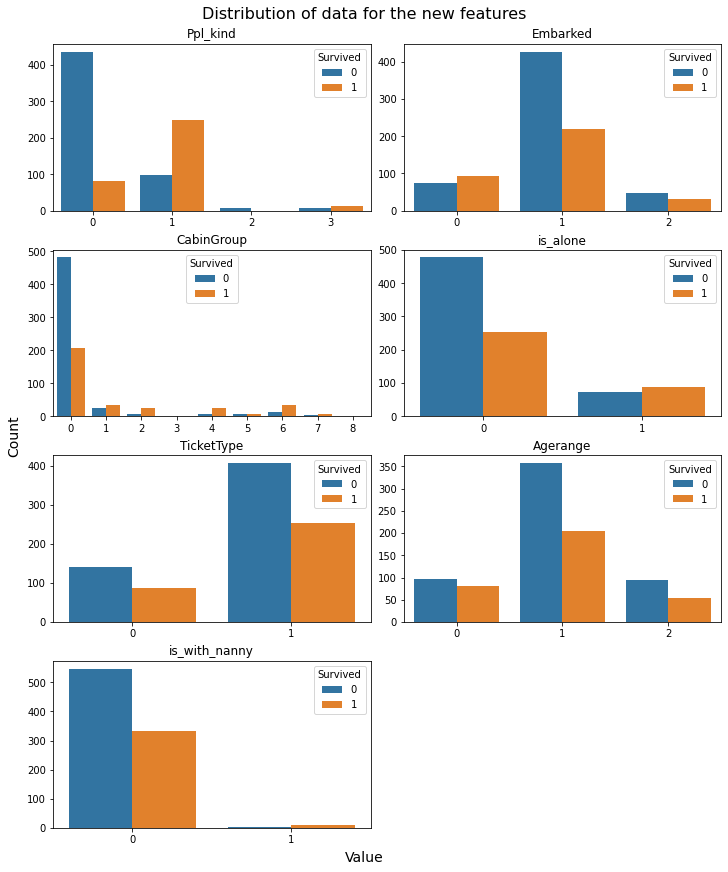

In [24]:
fig, axs = plt.subplots(4, 2, figsize=(10, 12), constrained_layout=True)
index = []
cols = ['Ppl_kind', 'Embarked', 'CabinGroup', 'is_alone', 'TicketType', 'Agerange', 'is_with_nanny']
for i in range(4):
    for j in range(2):
        index.append(axs[i][j])
for i in range(len(cols)):
    sns.countplot(x=cols[i], hue='Survived', data=data, ax=index[i]).set(title=cols[i], xlabel=None, ylabel=None)

axs[3, 1].remove()
fig.supxlabel("Value").set_fontsize(14)
fig.supylabel("Count").set_fontsize(14)
fig.suptitle("Distribution of data for the new features").set_fontsize(16)

### Notice:
    - We can tell that TicketType is just showing us the same distribution of the survivors. So it's not giving us any new information to help us predict.
    - Also the is_with_nanny column, is not helpful since all the data in one side.
    - Let's just drop them off :)

In [25]:
nTest = clean(test)
nTest = transform(nTest)
nTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pclass         418 non-null    int64  
 1   Sex            418 non-null    int64  
 2   Fare           418 non-null    float64
 3   Embarked       418 non-null    int64  
 4   is_alone       418 non-null    int64  
 5   is_with_nanny  418 non-null    int64  
 6   Agerange       418 non-null    int64  
 7   Ppl_kind       418 non-null    int64  
 8   CabinGroup     418 non-null    int64  
 9   TicketType     418 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 32.8 KB


In [26]:
data.drop(['TicketType', 'is_with_nanny'], axis=1, inplace=True)
nTest.drop(['TicketType', 'is_with_nanny'], axis=1, inplace=True)

# Model Selection

In [27]:
X = data.drop('Survived', axis=1)
y = data.Survived

    We have to scale the data for fast calculation and best scores.

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
nTest_scaled = scaler.transform(nTest)

    Spliting the data into train & test

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

    Importing the models & evaluation metrics

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

    Making a DataFrame to store all models data for better visual and make the comparing phase easier.

In [31]:
# probability=True for SVC
algos = [
    RandomForestClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    LogisticRegression(),
    SVC(probability=True),
    XGBClassifier(),
    CatBoostClassifier(verbose=0),
    LGBMClassifier()
]

df = {"Model": [], "Accuracy Score in Train": [], "Accuracy Score in Test": [], "Cross Validation Mean": []}
for algo in algos:
    model = algo.fit(X_train, y_train)
    proba = algo.predict_proba(X_test)
    y_pred = []
    for p in proba:
        if p[0] > p[1]:
            y_pred.append(0)
        else:
            y_pred.append(1)
    df["Model"].append(str(algo)[:str(algo).find('(')])
    df["Accuracy Score in Test"].append(accuracy_score(y_test, y_pred))
    df["Accuracy Score in Train"].append(algo.score(X_train, y_train))
    df["Cross Validation Mean"].append(cross_val_score(algo, X_scaled, y, cv=10).mean())

models = pd.DataFrame(df)
models

,Model,Accuracy Score in Train,Accuracy Score in Test,Cross Validation Mean
0,RandomForestClassifier,0.945225,0.793296,0.810362
1,GaussianNB,0.755618,0.776536,0.754307
2,DecisionTreeClassifier,0.945225,0.793296,0.795755
3,KNeighborsClassifier,0.858146,0.826816,0.813795
4,LogisticRegression,0.800562,0.782123,0.786754
5,SVC,0.841292,0.826816,0.826080
6,XGBClassifier,0.932584,0.798883,0.819351
7,<catboost.core.CatBoostClassifier object at 0x...,0.903090,0.826816,0.824956
8,LGBMClassifier,0.919944,0.837989,0.823845


### Notice:
    - As we can see there is some models that are overfitting like RandomForestClassifier, DecisionTreeClassifier and XGBClassifier ...
    - Also the most important information in the DataFrame is that the SVC algorithm have the highest "Cross Validation Mean", and the model is not overfitting. So, congratulations we got our best model :))

    Let's try to get the best parameter for our model :)

In [32]:
%%capture --no-display
from sklearn.model_selection import GridSearchCV

parms = {
    'kernel': ['rbf', 'sigmoid', 'linear'],
    'C': [1.0, 0.0, 0.25, 0.5],
    'random_state': [None, 0, 1, 2, 10],
    'gamma': ['scale', 'auto']
}
gsc = GridSearchCV(SVC(), parms)
gsc.fit(X_scaled, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.0, 0.0, 0.25, 0.5], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid', 'linear'],
                         'random_state': [None, 0, 1, 2, 10]})

## Best Model Paramters

In [33]:
print(f"The best paramters: {gsc.best_params_}")
print(f"The best score: {gsc.best_score_}")

The best paramters: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': None}
The best score: 0.8137593371414222


### Notice:
    - These all are default paramters.

In [34]:
cls = SVC().fit(X_scaled, y)
print("Complete")

Complete


# Making a Submission

In [35]:
predicted = cls.predict(nTest_scaled)
sub.Survived = predicted
sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [36]:
sub.to_csv('submission.csv', index=False)

<hr>
<p style="text-align: right">Titanic Competition | <span style="color: green">Successfuly Completed</span></p>